# Line extraction

The idea is to try to eliminate the straight, box lines from an image

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import numpy as np
import cv2

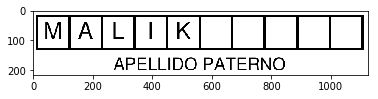

In [15]:
img_fp = "../img/last-name.png"
img = cv2.imread(img_fp)
plt.imshow(img)

In [16]:
height, width, channels = img.shape

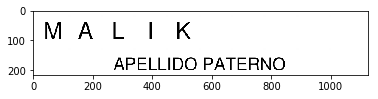

In [17]:
inv = cv2.bitwise_not(img)
horizontal_img = inv.copy()
vertical_img = inv.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(width*.25), 1))
horizontal_img = cv2.erode(horizontal_img, kernel, iterations=1)
horizontal_img = cv2.dilate(horizontal_img, kernel, iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 110))
vertical_img = cv2.erode(vertical_img, kernel, iterations=1)
vertical_img = cv2.dilate(vertical_img, kernel, iterations=1)

mask_img = horizontal_img + vertical_img
no_border = np.bitwise_or(img, mask_img)

cv2.imwrite("../output/no_border.png", no_border)
plt.imshow(no_border)

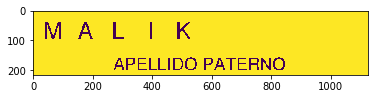

In [18]:
gray = cv2.cvtColor(no_border, cv2.COLOR_BGR2GRAY)

# check to see if we should apply thresholding to preprocess the
# image
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.imshow(gray)

In [6]:
text = pytesseract.image_to_string(gray)
print(text)

29012019
FECHA OTORGAMIENTO.
